# Text analysis and topic modeling of the pubmed papers 

In [ ]:
#!pip install gensim

In [ ]:
#!pip install pyLDAvis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import gensim
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


from nltk.corpus import stopwords

import gensim.corpora as corpora

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

from wordcloud import WordCloud,STOPWORDS

In [2]:
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading of the paper titles and abstracts already preprocessed(punctuation removal and normalization) and plots

In [4]:
df = pd.read_csv("drive/MyDrive/Bioscienze/Progetto/Data/data_text/sugar_clean.csv")
df_human = pd.read_csv("drive/MyDrive/Bioscienze/Progetto/Data/data_text/sugar_human_clean.csv")

In [41]:
# Dataset containing all papers
df.head(3)

,id,title,abstract,year,all_text,clean_text,clean_title,clean_abstract,Topic,pTopic,MultiTopic
0,37240315,SIRT2 Deficiency Aggravates Diet-Induced Nonal...,"Non-alcoholic fatty liver disease (NAFLD), cha...",2023.0,SIRT2 Deficiency Aggravates Diet-Induced Nonal...,sirt deficiency aggravates dietinduced nonalco...,sirt deficiency aggravates dietinduced nonalco...,nonalcoholic fatty liver disease nafld charact...,1,0.999248,[1]
1,37210385,Ginger essential oil and citral ameliorates at...,"Recently, the role of the gut microbiota in di...",2023.0,Ginger essential oil and citral ameliorates at...,ginger essential oil and citral ameliorates at...,ginger essential oil and citral ameliorates at...,recently the role of the gut microbiota in dis...,0,0.536237,"[0, 1]"
2,37207566,Antiobesity effect of L-arabinose via ameliora...,"The global prevalence of obesity, a chronicall...",2023.0,Antiobesity effect of L-arabinose via ameliora...,antiobesity effect of larabinose via ameliorat...,antiobesity effect of larabinose via ameliorat...,the global prevalence of obesity a chronically...,0,0.671845,"[0, 1]"


In [42]:
# Dataset containing only "human" papers
df_human.head(3)

,id,title,abstract,year,all_text,clean_text,clean_title,clean_abstract,Topic,pTopic,MultiTopic
0,37172822,Excess Dietary Sugar Alters Colonocyte Metabol...,The colonic epithelium requires continuous ren...,2023,Excess Dietary Sugar Alters Colonocyte Metabol...,excess dietary sugar alters colonocyte metabol...,excess dietary sugar alters colonocyte metabol...,the colonic epithelium requires continuous ren...,0,0.996755,[0]
1,37111220,Blood and Tissue Advanced Glycation End Produc...,Cardiometabolic disorders are characterised by...,2023,Blood and Tissue Advanced Glycation End Produc...,blood and tissue advanced glycation end produc...,blood and tissue advanced glycation end produc...,cardiometabolic disorders are characterised by...,0,0.552968,"[0, 1]"
2,37101636,Therapeutic potential of bioactive phytoconsti...,"Nonalcoholic fatty liver disease (NAFLD), a ch...",2023,Therapeutic potential of bioactive phytoconsti...,therapeutic potential of bioactive phytoconsti...,therapeutic potential of bioactive phytoconsti...,nonalcoholic fatty liver disease nafld a chron...,0,0.999352,[0]


Plot of the proportion of the results of both query queries(the one with 'human' and the one without)

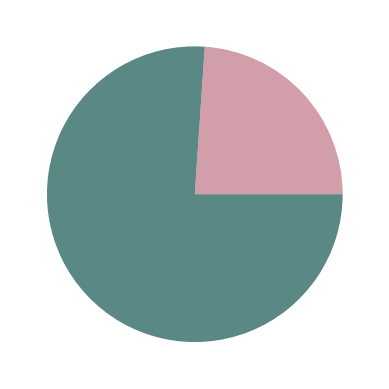

In [43]:
sizes = [161, 512]
colors = ["#D19EAA","#5A8884"]
fig, ax = plt.subplots()
ax.pie(sizes,colors=colors)
plt.savefig("pie.png",transparent=True, dpi = 300)

Wordclouds of the two groups:

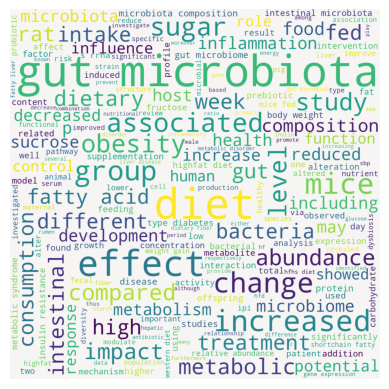

In [45]:
text = " ".join(df["clean_text"])
wordcloud = WordCloud(width = 1600, height = 1600, 
            background_color ="#F6F5F4").generate(text)
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud.png",dpi=300)
plt.show()

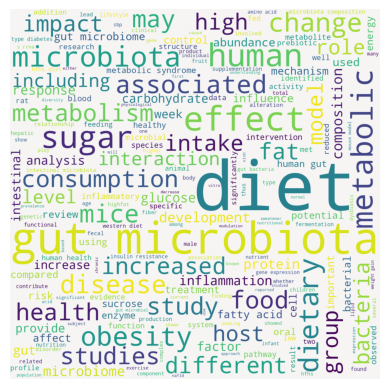

In [46]:
text = " ".join(df_human["clean_text"])
wordcloud_human = WordCloud(width = 1600, height = 1600, 
            background_color ="#F6F5F4").generate(text)
# Generate plot
plt.imshow(wordcloud_human)
plt.axis("off")
plt.savefig("wordcloud.png",dpi=300)
plt.show()

Next we are going to highlight the words only present in a group and viceversa:

In [47]:
cond_sugar = [i in list(wordcloud_human.words_.keys()) for i in list(wordcloud.words_.keys())]
color_sugar = ["black" if i else "red" for i in cond_sugar]

In [48]:
color_dict = {}
for i in range(len(list(wordcloud.words_.keys()))):
    color_dict[list(wordcloud.words_.keys())[i]] = color_sugar[i]

In [49]:
class SimpleGroupedColorFunc(object):

    def __init__(self, color_dict, default_color):
        self.word_to_color = color_dict

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

In [50]:
grouped_color_func = SimpleGroupedColorFunc(color_dict, "blue")

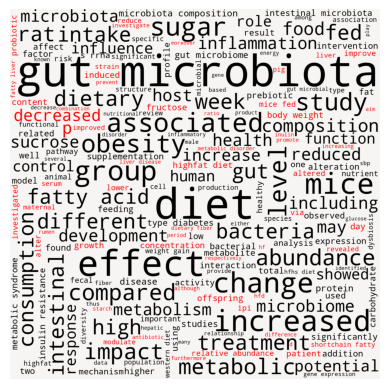

In [51]:
wordcloud.recolor(color_func=grouped_color_func)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud_diff_sugar.pdf",transparent=True,dpi=300)
plt.show()


In [52]:
cond_human = [i in list(wordcloud.words_.keys()) for i in list(wordcloud_human.words_.keys())]
color_human = ["black" if i else "red" for i in cond_human]

In [53]:
human_dict = {}
for i in range(len(list(wordcloud_human.words_.keys()))):
    human_dict[list(wordcloud_human.words_.keys())[i]] = color_human[i]

In [54]:
grouped_color_func_human = SimpleGroupedColorFunc(human_dict, "grey")

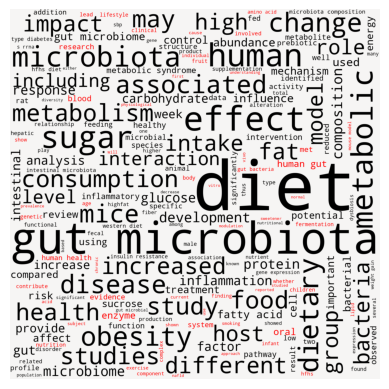

In [55]:
wordcloud_human.recolor(color_func=grouped_color_func_human)
plt.imshow(wordcloud_human)
plt.axis("off")
plt.savefig("wordcloud_diff_human.pdf",transparent = True, dpi=300)
plt.show()


## Topic Modeling with LDA

In [ ]:

def remove_stopwords(tokenized_text):
  stop_words = stopwords.words('english')
  tokenized_text_without_stopwords = []
  for token in tokenized_text:
    if token.lower() not in stop_words and len(token)>2 and token.lower()!="fig":
      tokenized_text_without_stopwords.append(token)
  return tokenized_text_without_stopwords


def lemmatization(tokenized_text):
  wnl = WordNetLemmatizer()
  n_words = len(tokenized_text)
  for idx in range(n_words):
    tokenized_text[idx] = wnl.lemmatize(tokenized_text[idx])
  return tokenized_text


def stemming(tokenized_text):
    stemmer = SnowballStemmer("english")
    n_words = len(tokenized_text)
    for idx in range(n_words):
      tokenized_text[idx] = stemmer.stem(tokenized_text[idx])
    return tokenized_text
    

def preprocess(text,stopword = True, lemma = True,stem=False):
  tokenized_text =  WordPunctTokenizer().tokenize(text)
  if stopword:
    tokenized_text = remove_stopwords(tokenized_text)
  
  if lemma:
    tokenized_text = lemmatization(tokenized_text)
  
  if stem:
    tokenized_text = stemming(tokenized_text)

  return tokenized_text

In [57]:
def get_lda_model(text, num_topics):
    main_text = text
    # all lower case    
    main_text = main_text.apply(lambda x: x.lower())
    # lemmatization and stop words removal
    main_text = main_text.apply(lambda x: preprocess(x))
    # dictionary creation
    id2word = corpora.Dictionary(main_text)

    id2word.filter_extremes(no_below=3, no_above=0.5)

    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in main_text]

    lda_model = gensim.models.LdaModel(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics,
                                    random_state=100,
                                    chunksize=10000,
                                    passes=15,
                                    iterations=500,
                                    alpha='auto',
                                    eta="auto",
                                    eval_every=None)
    
    return lda_model,corpus, id2word

In [58]:
def get_wordcloud_from_lda(lda_model,num_topics):
    rows = num_topics//2
    cols = 2
    t = 0
    for i in range(rows):
        for j in range(cols):
            plt.imshow(WordCloud(background_color="#F6F5F4",max_words=500).fit_words(dict(lda_model.show_topic(t, 500))))
            plt.axis("off")
            t+=1
            plt.savefig(f"lda_{i}{j}.png",dpi=600)

    
    plt.show(fig)

In [59]:
def assign_topic(model,docs):
  docs_tuples = model.get_document_topics(docs,minimum_probability=0)
  topic_docs = [0]*len(docs_tuples)
  max_prob_docs = [0]*len(docs_tuples)
  for n in range(len(docs_tuples)):
    doc_tuples = docs_tuples[n]
    doc_probs = [0]*model.num_topics
    for i in range(model.num_topics):
      doc_probs[i] = doc_tuples[i][1]
    
    topic = np.argmax(doc_probs)
    prob = np.max(doc_probs)
    topic_docs[n] = topic
    max_prob_docs[n] = prob
  
  return topic_docs, max_prob_docs

In [60]:
def assign_multitopic(model,docs,threshold = 0.25):
  topic_prob = model.get_document_topics(docs,minimum_probability=0)
  topic_docs = [0]*len(topic_prob)
  for n in range(len(topic_prob)):
    doc = topic_prob[n]
    probs = [0]*model.num_topics
    for i in range(model.num_topics):
      probs[i] = doc[i][1]
    
    topic_list = [i for i in range(model.num_topics) if probs[i]>threshold]
    topic_docs[n] = topic_list
  
  return topic_docs

In [25]:
sugar_lda,sugar_corpus, sugar_id2word = get_lda_model(df.clean_text,num_topics = 2)

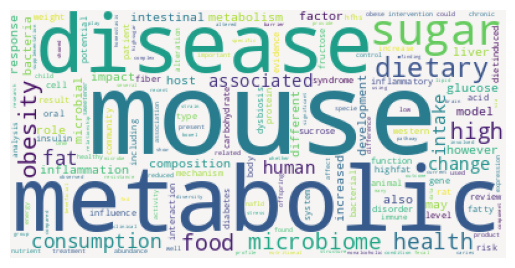

In [26]:
get_wordcloud_from_lda(sugar_lda,num_topics= 2)

In [27]:
pyLDAvis.enable_notebook()
LDAvis_sugar = gensimvis.prepare(sugar_lda, sugar_corpus, sugar_id2word,sort_topics=True)
LDAvis_sugar
pyLDAvis.save_html(LDAvis_sugar, 'lda4_sugar.html')

In [28]:
human_lda,human_corpus, human_id2word = get_lda_model(df_human.clean_text,num_topics = 2)

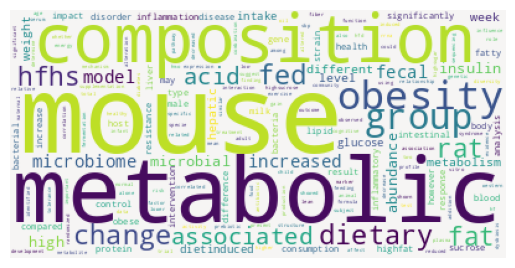

In [31]:
get_wordcloud_from_lda(human_lda,num_topics= 2)

In [32]:
pyLDAvis.enable_notebook()
LDAvis_human = gensimvis.prepare(human_lda, human_corpus, human_id2word,sort_topics=True)
LDAvis_human
pyLDAvis.save_html(LDAvis_human, 'lda2_human.html')

In [33]:
topic_names = {"0":"Topic 1",
               "1":"Topic 2",
               "2":"Topic 3",
               "3":"Topic 4"}

In [34]:
topic_sugar,prob_sugar = assign_topic(sugar_lda,sugar_corpus)
topic_human,prob_human = assign_topic(human_lda,human_corpus)

multitopics_sugar = assign_multitopic(sugar_lda,sugar_corpus)
multitopics_human = assign_multitopic(human_lda,human_corpus)


In [35]:
df["Topic"] = topic_sugar
df["pTopic"] = prob_sugar
df["MultiTopic"] = multitopics_sugar

df_human["Topic"] = topic_human
df_human["pTopic"] = prob_human
df_human["MultiTopic"] = multitopics_human

Lets now define the top article for each topic and print them:

In [36]:
def print_top_titles(df,topic_names,top_n=5):
  for t in df.Topic.unique():
    print("Titoli dei documenti del Topic {} '{}'".format(t,topic_names[str(t)]))
    df_t = df[df["Topic"]==t]
    top_df = df_t.sort_values(by="pTopic",ascending=False).iloc[0:top_n]
    bot_df = df_t.sort_values(by="pTopic",ascending=True).iloc[0:top_n]
    print(f"Top {top_n}:")
    for i in range(top_df.shape[0]):
      print(top_df.title.iloc[i]," (p:",round(top_df.pTopic.iloc[i],3),")")
    print("\n")
    print(f"Bottom {top_n}:")
    for i in range(bot_df.shape[0]):
      print(bot_df.title.iloc[i],"( p:",round(bot_df.pTopic.iloc[i],3),")")
  
    print("\n\n")

In [ ]:
print_top_titles(df,topic_names,top_n=5)

In [ ]:
print_top_titles(df_human,topic_names,top_n=5)